## Analysis of a coarse-grained trajectory: density maps, aspect ratio, 

#### In this notebook we will learn how to calculate the density distribution of an amphiphilic coarse grained peptide that self-assembles to form a fiber. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.lib import distances 
from MDAnalysis.analysis.lineardensity import LinearDensity
from MDAnalysis.transformations import center_in_box
from MDAnalysis.lib.mdamath import make_whole
#density profile of fiber - in cylindrical coordinates!
#rdfs
#MDAnalysis.analysis.density.density_from_Universe

In [53]:
u = mda.Universe('CG_trj/126chains.psf', 'CG_trj/126chains_whole.dcd')

In [54]:
poly = u.atoms.select_atoms('not name W and not name CL and not name NA')

In [55]:
w = u.atoms.select_atoms('name W')

In [56]:
POLY = nv.show_mdanalysis(poly)
POLY

/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/anaconda/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:906: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


A Jupyter Widget

In [61]:
AAA=poly.atoms.select_atoms('resname AAA')
BBB=poly.atoms.select_atoms('resname BBB')
CCC=poly.atoms.select_atoms('resname CCC')
DDD=poly.atoms.select_atoms('resname DDD')

In [77]:
Wdens = LinearDensity(w, binsize=0.5, start=1900)
Wdens.run()
Adens = LinearDensity(AAA, binsize=0.5, start=1900)
Adens.run()
Bdens = LinearDensity(BBB, binsize=0.5, start=1900)
Bdens.run()
Cdens = LinearDensity(CCC, binsize=0.5, start=1900)
Cdens.run()
Ddens = LinearDensity(DDD, binsize=0.5, start=1900)
Ddens.run()

/anaconda/lib/python3.6/site-packages/MDAnalysis/analysis/base.py:115: DeprecationWarning: Setting the following kwargs should be done in the run() method: start
  DeprecationWarning)


In [78]:
Adens_xy = 0.5*(Adens.results['x']['pos']+ Adens.results['y']['pos'])
Bdens_xy = 0.5*(Bdens.results['x']['pos']+ Bdens.results['y']['pos'])
Cdens_xy = 0.5*(Cdens.results['x']['pos']+ Cdens.results['y']['pos'])
Ddens_xy = 0.5*(Ddens.results['x']['pos']+ Ddens.results['y']['pos'])
Wdens_xy = 0.5*(Wdens.results['x']['pos']+ Wdens.results['y']['pos'])

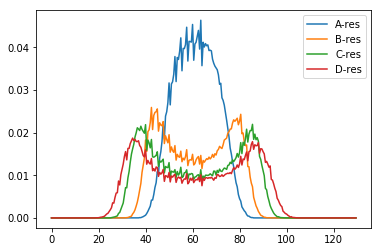

In [79]:
x=np.arange(0,AAA.dimensions[1], 0.5)
fig, ax = plt.subplots()
ax.plot(x, Adens_xy, label='A-res')
ax.plot(x, Bdens_xy, label='B-res')
ax.plot(x, Cdens_xy, label='C-res')
ax.plot(x, Ddens_xy, label='D-res')
#ax.plot(x, Wdens_xy, label='water')
plt.legend()
plt.show()